# Zharkova Olga, 9 variant, 18-IVT-2

## Набор данных: 3_air_quality
## Кодировка классификаторов:
### 2 – линейная регрессия, LASSO регуляризатор;
### 3 – линейная регрессия, RIDGE регуляризатор;

### *Подключаем библиотеки*

In [49]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
warnings.simplefilter('ignore')
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [30]:
air=pd.read_csv("AirQualityUCI.csv",sep=';', decimal=',')
air.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


## *1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).*

0. *Date - дата (ДД/ММ/ГГГГ)*
1. *Time - время (ЧЧ.ММ.СС)*
2. *CO(GT) - Истинная часовая усредненная концентрация CO в мг / м^3 (эталонный анализатор)*
3. *PT08.S1(CO) - PT08.S1 (оксид олова) часовой усредненный отклик датчика (номинально CO-таргетированный)*
4. *NMHC(GT) - Истинная почасовая усредненная общая концентрация неметаллических углеводородов в мкг / м^3 (эталонный анализатор)*
5. *C6H6(GT) - Истинная почасовая усредненная концентрация бензола в мкг / м^3 (эталонный анализатор)*
6. *PT08.S2(NMHC) - PT08.S2 (диоксид титана) часовой усредненный отклик датчика (номинально для nmhc)*
7. *NOx(GT) - Истинная почасовая усредненная концентрация NOx в ppb (эталонный анализатор)*
8. *PT08.S3(NOx)	 - PT08.S3 (оксид вольфрама) среднечасовой отклик датчика (номинально на NOx)*
9. *NO2(GT) - Истинная среднечасовая концентрация NO2 в мкг/м^3 (эталонный анализатор)*
10. *PT08.S4(NO2) - PT08.S4 (оксид вольфрама) среднечасовой отклик датчика (номинально на NО2)*
11. *PT08.S5(O3)	 - PT08.S5 (оксид индия) среднечасовой отклик датчика (номинально на O3)*
12. *T	 - Температура в °C*
13. *RH - Относительная влажность (%)*
14. *AH  - Абсолютная влажность*

## *2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;*

In [31]:
init_len= len(air)
air.drop_duplicates(keep= False,inplace=True)
finit_len = len(air)
print("Удалено дубликатов: " , init_len - finit_len)

Удалено дубликатов:  114


In [32]:
air.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


## *3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);*

In [38]:
numerical = [c for c in air.columns if air[c].dtype.name != 'object']
print("Количественные признаки: ", numerical)

Количественные признаки:  ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


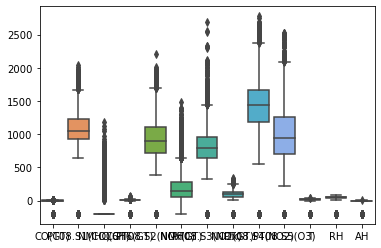

In [39]:
before_scaling = numerical
sns.boxplot(data = air[before_scaling])

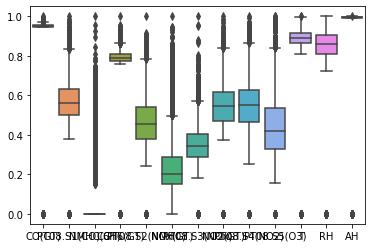

In [42]:
air[before_scaling] = MinMaxScaler().fit_transform(air[before_scaling])
sns.boxplot(data = air[before_scaling])

## *4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;*

In [44]:
categorical = [c for c in air.columns if air[c].dtype.name == 'object']
print("Категориальные признаки: ", categorical)

Категориальные признаки:  ['Date', 'Time']


In [51]:
for column in list(air):
    air[column] = pd.Series(label_encoder.fit_transform(air[column])) 
air.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,114,18,26,666,136,119,623,163,700,108,986,977,146,380,1896
1,114,19,20,598,101,94,532,100,818,87,853,681,143,368,1727
2,114,20,22,708,78,90,516,128,784,109,849,783,129,431,1853
3,114,21,22,682,70,92,525,169,736,117,878,912,120,491,2056
4,114,22,16,578,41,65,413,128,848,111,784,819,122,487,2066
5,114,23,12,503,28,47,327,86,971,91,687,658,122,483,2045
6,127,0,12,491,22,36,267,59,1054,72,627,442,123,459,1909
7,127,1,10,442,22,33,249,59,1048,71,627,439,117,491,1962
8,127,2,9,400,15,23,186,42,1114,55,570,329,117,488,1935
9,127,3,6,316,10,17,138,0,1153,0,529,210,113,493,1863


### *5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;*

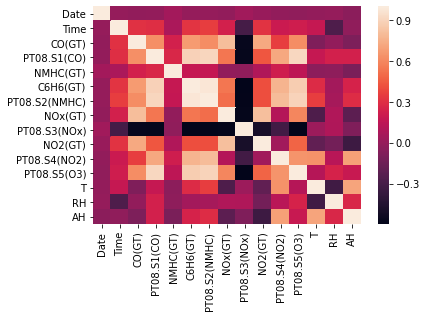

In [54]:
sns.heatmap(air.corr())

## *6.	Заполните пропущенные значения в данных;*

In [56]:
air.count()

Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

Вывод:пропущенных значений в данных нет

## *7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.* 

In [58]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [70]:
data_X, data_Y = air.drop('NMHC(GT)', axis=1).values, air['NMHC(GT)']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

#### 2 – линейная регрессия, LASSO регуляризатор;

In [71]:
lasso = Lasso()

search = GridSearchCV(lasso, {'alpha': np.arange(0.005, 5, 0.005)})
search.fit(train_x, train_y)
best = search.best_estimator_.alpha

lasso = Lasso(alpha=best)
lasso.fit(train_x, train_y)
lasso_predict = lasso.predict(test_x)
P, p_value_P = pearsonr(lasso_predict, test_y)
S, p_value_S = spearmanr(lasso_predict, test_y)

In [72]:
print('Лучшее значение Альфа:', best)
print("Коррелция по Пирсону: ", P)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Лучшее значение Альфа: 3.41
Коррелция по Пирсону:  0.6149181743031245
Корреляция по Спирмену:  0.4847109970285564
P_VALUSE_P : 9.012781447780027e-292
P_VALUSE_S : 2.0552752642700756e-165


#### 3 – линейная регрессия, RIDGE регуляризатор;

In [73]:
from sklearn.linear_model import Ridge
params = {'alpha': np.arange(2, 5, 0.05)}
reg = Ridge()
params = {'alpha': np.arange(2, 5, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(train_x, train_y)
best_alpha = reg_grid.best_estimator_.alpha
reg = Ridge(alpha=best_alpha)
reg.fit(train_x,train_y)
pred_reg = reg.predict(test_x)
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)

In [74]:
print("Коррелция по Пирсону: ", P)
print("Корреляция по Спирмену:: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Коррелция по Пирсону:  0.6155163795370518
Корреляция по Спирмену::  0.4847952515107281
P_VALUSE_P : 1.7093240950011204e-292
P_VALUSE_S : 1.7690269475034113e-165
